# Interspeech 2021 results
This notebook displays replicated results for our Interspeech 2021 paper
[1]. Note that we haven't added replicated results for auDeep features
yet because the embeddings we currently have are not as good as what
were used in the original paper.

[1] A. Keesing, Y. S. Koh, and M. Witbrock, ‘Acoustic Features and
Neural Representations for Categorical Emotion Recognition from Speech’,
in Interspeech 2021, Aug. 2021, pp. 3415–3419. doi:
10.21437/Interspeech.2021-2217.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Orange.evaluation import graph_ranks

from ertk.stats import friedman_nemenyi

%matplotlib inline

In [2]:
def run_friedman(table: pd.DataFrame):
    pvalue, cd, df = friedman_nemenyi(table)
    graph_ranks(df["mean_rank"], df.index, cd)
    print(f"p = {pvalue}, cd = {cd:.2f} ranks")
    print(df.to_string())
    print()
    ranked_cols = df.index
    return ranked_cols

## Results using "offline" per-speaker normalisation

In [3]:
dfs = []
for results_csv in Path("./results/norm_offline").glob("**/*.csv"):
    df = pd.read_csv(results_csv)
    # Select columns before taking mean
    df = df[["uar", "war", "microf1", "macrof1"]].mean().to_frame().T
    df["corpus"] = results_csv.parts[-3]
    df["clf"] = results_csv.parts[-2]
    df["features"] = results_csv.stem
    dfs.append(df)
df = pd.concat(dfs)

Friedman test for classifiers by corpus:
p = 4.38172020849754e-15, cd = 2.91 ranks
             mean_rank      mean  std. dev.    median       mad  Effect size
svm_rbf       1.705882  0.535086   0.131580  0.557107  0.085830     0.000000
svm_poly2     2.823529  0.531389   0.131973  0.554275  0.086215     0.032918
svm_poly3     3.647059  0.530403   0.132567  0.547094  0.084966     0.117240
svm_linear    4.411765  0.525789   0.130274  0.552925  0.085786     0.048733
depinto2020   5.294118  0.521792   0.136472  0.539881  0.088797     0.197258
mlp_2layer    5.411765  0.522205   0.130803  0.538139  0.083837     0.223570
mlp_3layer    6.058824  0.516321   0.128222  0.524577  0.082695     0.385978
mlp_1layer    6.705882  0.518426   0.131897  0.531646  0.084923     0.298211
rf            8.941176  0.474857   0.130280  0.506944  0.092961     0.560680

Friedman test for features by corpus:
p = 1.8296272591565363e-25, cd = 5.59 ranks
               mean_rank      mean  std. dev.    median       ma

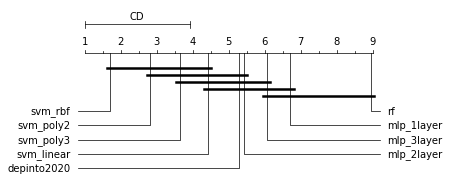

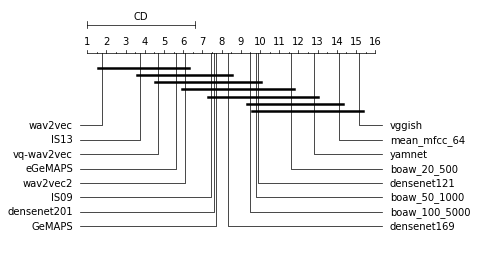

In [4]:
max_clf = df.pivot_table(values="uar", index="corpus", columns="clf", aggfunc="max")
mean_clf = df.pivot_table(values="uar", index="corpus", columns="clf", aggfunc="mean")
max_feat = df.pivot_table(
    values="uar", index="corpus", columns="features", aggfunc="max"
)
mean_feat = df.pivot_table(
    values="uar", index="corpus", columns="features", aggfunc="mean"
)
clf_feat = df.pivot_table(values="uar", index="clf", columns="features", aggfunc="mean")

print("Friedman test for classifiers by corpus:")
rankclf = run_friedman(mean_clf)

print("Friedman test for features by corpus:")
rankfeat = run_friedman(mean_feat)

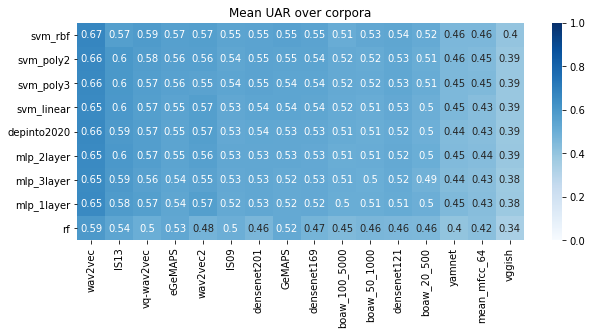

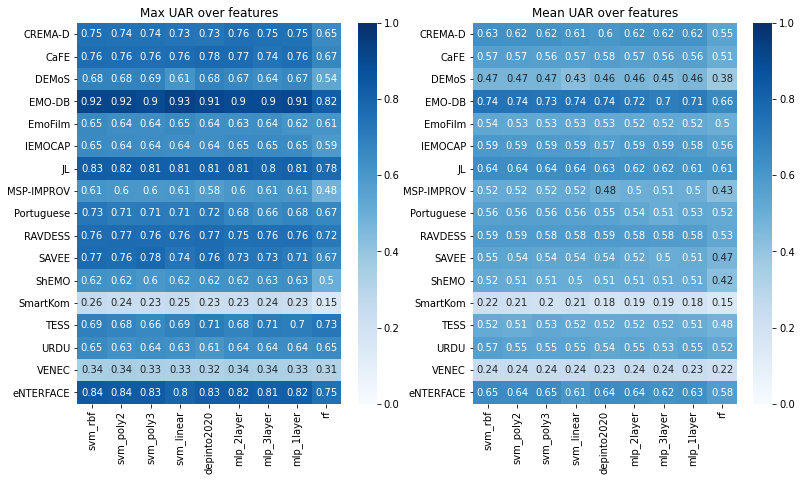

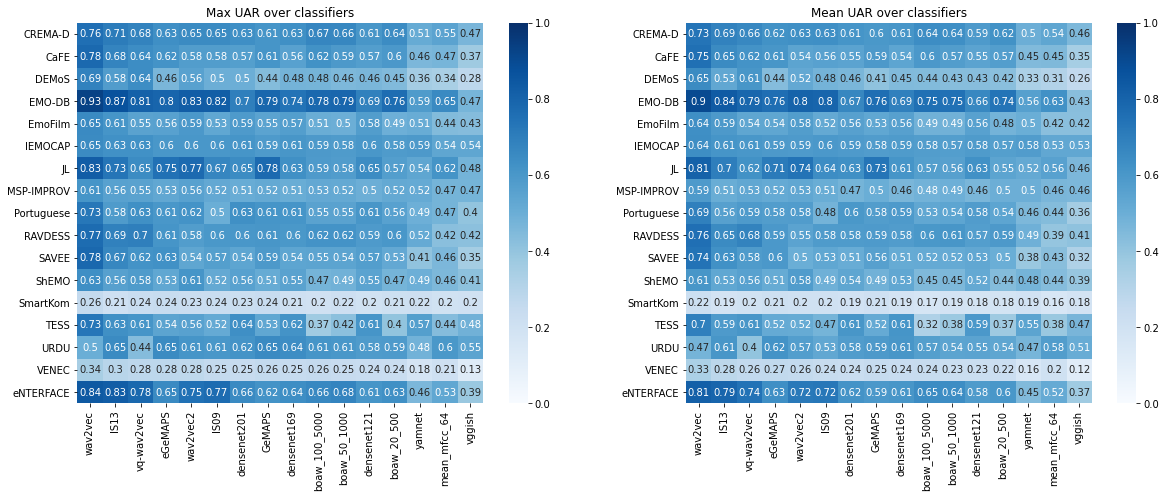

In [5]:
max_clf = max_clf[rankclf]
mean_clf = mean_clf[rankclf]
max_feat = max_feat[rankfeat]
mean_feat = mean_feat[rankfeat]
clf_feat = clf_feat.loc[rankclf, rankfeat]

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.heatmap(clf_feat, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax)
ax.set(xlabel=None, ylabel=None, title="Mean UAR over corpora")

fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sns.heatmap(max_clf, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[0])
ax[0].set(xlabel=None, ylabel=None, title="Max UAR over features")
sns.heatmap(mean_clf, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[1])
ax[1].set(xlabel=None, ylabel=None, title="Mean UAR over features")

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(max_feat, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[0])
ax[0].set(xlabel=None, ylabel=None, title="Max UAR over classifiers")
sns.heatmap(mean_feat, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[1])
ax[1].set(xlabel=None, ylabel=None, title="Mean UAR over classifiers")

plt.show()

## Results using "online" normalisation

In [6]:
dfs = []
for results_csv in Path("./results/norm_online").glob("**/*.csv"):
    df = pd.read_csv(results_csv)
    # Select columns before taking mean
    df = df[["uar", "war", "microf1", "macrof1"]].mean().to_frame().T
    df["corpus"] = results_csv.parts[-3]
    df["clf"] = results_csv.parts[-2]
    df["features"] = results_csv.stem
    dfs.append(df)
df = pd.concat(dfs)

Friedman test for classifiers by corpus:
p = 2.5743036451346697e-09, cd = 2.91 ranks
             mean_rank      mean  std. dev.    median       mad  Effect size
mlp_2layer    2.764706  0.476298   0.119254  0.503947  0.083917     0.000000
depinto2020   3.588235  0.474632   0.122887  0.505046  0.084134    -0.013075
mlp_1layer    3.882353  0.473156   0.121257  0.499797  0.084575     0.049265
mlp_3layer    4.352941  0.471410   0.117770  0.503281  0.084254     0.007917
svm_poly2     4.470588  0.464226   0.124719  0.490560  0.085371     0.158151
svm_rbf       5.411765  0.461755   0.126878  0.490356  0.089134     0.156998
svm_poly3     5.529412  0.457762   0.125667  0.471296  0.085769     0.384816
svm_linear    6.294118  0.459174   0.123917  0.489868  0.084996     0.166695
rf            8.705882  0.423286   0.118501  0.442668  0.086873     0.717490

Friedman test for features by corpus:
p = 1.8046010164490035e-23, cd = 5.59 ranks
               mean_rank      mean  std. dev.    median       

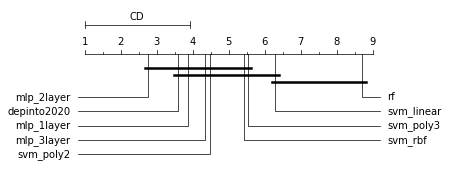

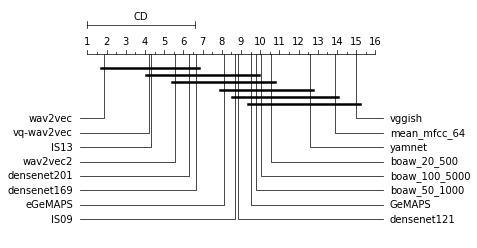

In [7]:
max_clf = df.pivot_table(values="uar", index="corpus", columns="clf", aggfunc="max")
mean_clf = df.pivot_table(values="uar", index="corpus", columns="clf", aggfunc="mean")
max_feat = df.pivot_table(
    values="uar", index="corpus", columns="features", aggfunc="max"
)
mean_feat = df.pivot_table(
    values="uar", index="corpus", columns="features", aggfunc="mean"
)
clf_feat = df.pivot_table(values="uar", index="clf", columns="features", aggfunc="mean")

print("Friedman test for classifiers by corpus:")
rankclf = run_friedman(mean_clf)

print("Friedman test for features by corpus:")
rankfeat = run_friedman(mean_feat)

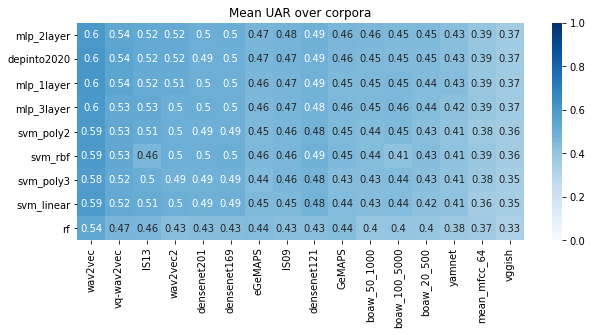

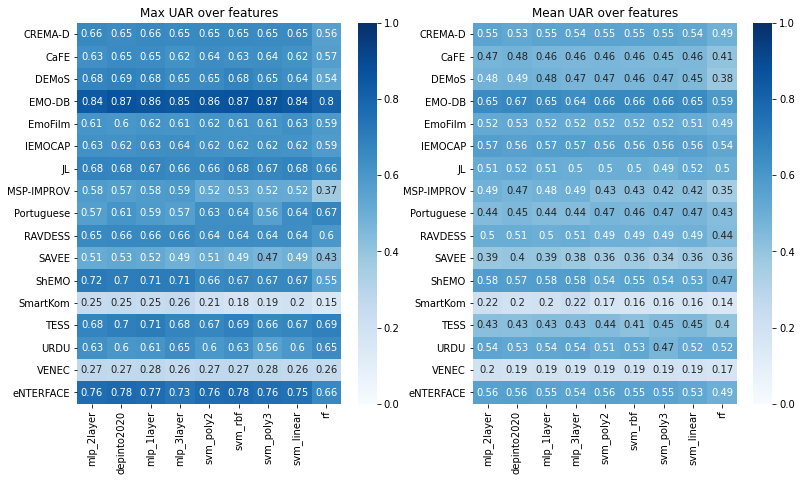

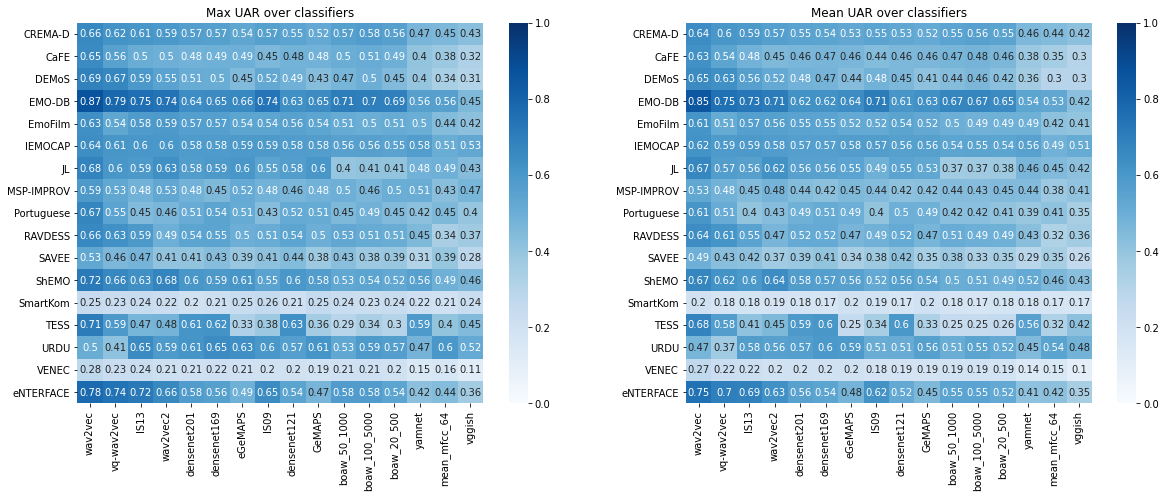

In [8]:
max_clf = max_clf[rankclf]
mean_clf = mean_clf[rankclf]
max_feat = max_feat[rankfeat]
mean_feat = mean_feat[rankfeat]
clf_feat = clf_feat.loc[rankclf, rankfeat]

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.heatmap(clf_feat, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax)
ax.set(xlabel=None, ylabel=None, title="Mean UAR over corpora")

fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sns.heatmap(max_clf, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[0])
ax[0].set(xlabel=None, ylabel=None, title="Max UAR over features")
sns.heatmap(mean_clf, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[1])
ax[1].set(xlabel=None, ylabel=None, title="Mean UAR over features")

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(max_feat, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[0])
ax[0].set(xlabel=None, ylabel=None, title="Max UAR over classifiers")
sns.heatmap(mean_feat, vmin=0, vmax=1, cmap="Blues", annot=True, ax=ax[1])
ax[1].set(xlabel=None, ylabel=None, title="Mean UAR over classifiers")

plt.show()